# Importing Important Libraries 

In [41]:
import cv2
import matplotlib.pyplot as plt

# Class Sketch For Converting Image To Pencil Sketch

In [42]:
class Sketch:
    # static method for class Sketch to display results after each tranformation
    @staticmethod
    def display(image,title):
        plt.imshow(image,cmap="gray")
        plt.axis("off")
        plt.title(title)
        plt.show()
        
    # Constructor for class Sketch for loading image to variable
    def __init__(self,file_path=""):
        self.file_path = file_path
        self.image = cv2.cvtColor(cv2.imread(self.file_path),cv2.COLOR_BGRA2RGBA)
        Sketch.display(self.image,"Original Image")
    
    # private object method for converting image to grayscale
    def __grayscale(self):
        self.gray = cv2.cvtColor(self.image,cv2.COLOR_BGRA2GRAY)
        Sketch.display(self.gray,title="Grayscaled Image")
    
    # private object method for inverting image color 
    def __invert(self):
        self.inv  = cv2.bitwise_not(self.gray)
        Sketch.display(self.inv,"Inverted Image")
    
    # private object method for smoothing image
    def __smooth(self):
        self.bl = cv2.GaussianBlur(self.inv, (21, 21),sigmaX=0, sigmaY=0)
        Sketch.display(self.bl,"Smooth Image")

    # object method for processing all above methods on an image and convert it to pencil sketch and save it
    def sketch(self):
        Sketch.__grayscale(self)
        Sketch.__invert(self)
        Sketch.__smooth(self)
        self.sketched = cv2.divide(self.gray, 255 - self.bl, scale=255)
        Sketch.display(self.sketched,"Final Image")
        save_path = "\\".join(self.file_path.split("\\")[:-1])
        plt.imsave(f"{save_path}\Sketched_Image_By_Himanshu.jpg",self.sketched,cmap="gray")

# Function to create object of class Sketch and save Image

In [43]:
# Function to convert image to pencil sketch
def image_to_pencil(image):
    try:
        x=Sketch((fr'{image}'))
        x.sketch()
        print("Picture Saved Successfully !!! ")
    except Exception as e :
        print(e)

# Main Code Excecution

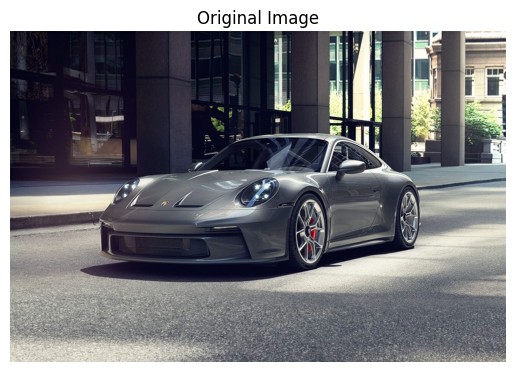

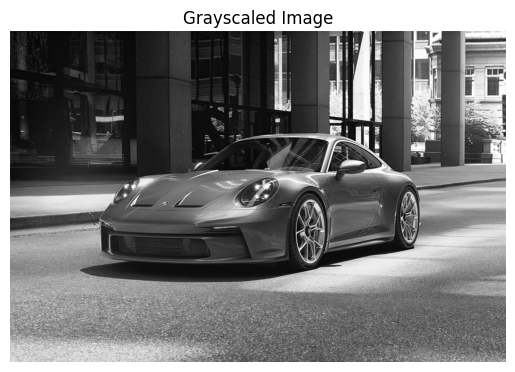

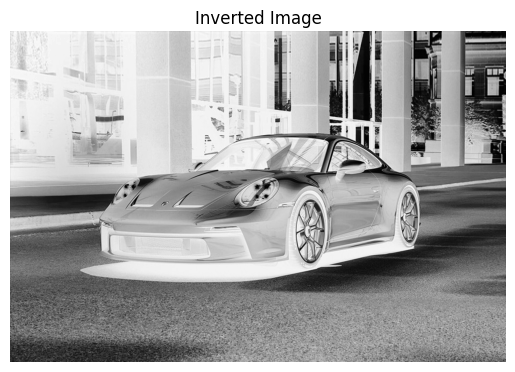

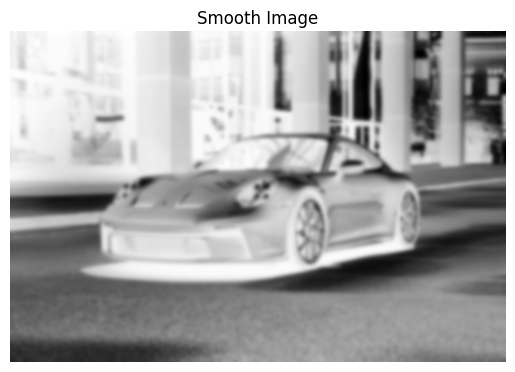

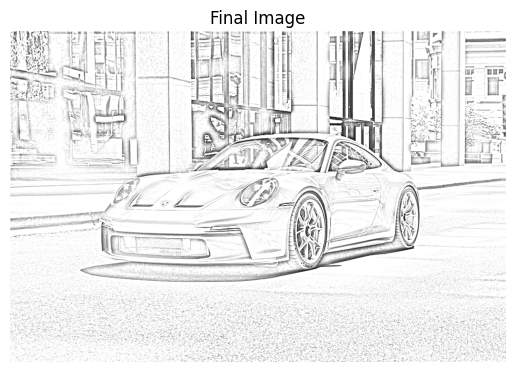

Picture Saved Successfully !!! 


In [44]:
# If Every Thing Worked Fine Then Run THe Program
if __name__ == "__main__":
    image = input("Please Enter Path To Image : \t")
    if image.endswith("\""):
        image = image.strip("\"")
    else : 
        image = image.strip("\'")    
    image_to_pencil(image)
        